In [2]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import r2_score
from scipy.optimize import minimize
from scipy import stats
from scipy.stats import powerlognorm
from scipy.stats import lognorm
from scipy.stats import beta
from scipy.stats import gamma
#from scipy.stats import powerlaw
from scipy.stats import chi2
from scipy.stats import genpareto
from scipy.stats import expon
from scipy.stats import truncnorm
from scipy.stats import norm
from scipy.stats import gengamma

In [58]:
def powerlaw_fit(pars):
    a = pars[0]
    k = pars[1]
    yPred = a*(x)**k
    LL = -np.sum(stats.norm.logpdf(yPred*tot, loc=y*tot, scale=np.sqrt(tot*y*(1-y)) ) )
    #sd = pars[4]
    #LL = -np.sum(stats.norm.logpdf(yPred, loc=y, scale= sd ) )
    return (LL)

def exponential_fit(pars):
    s = pars[0]
    l = pars[1]
    
    yPred = expon.pdf(x,loc=l,scale=s)
    LL = -np.sum( stats.norm.logpdf(yPred*tot, loc=y*tot, scale=np.sqrt(tot*y*(1-y)) ) )
    return (LL)

def lognormal_fit(pars):
    s = pars[0]
    l = pars[2]  
    alpha = pars[1]

    yPred =lognorm.pdf(x, s=s, loc = l, scale=alpha)
    LL = -np.sum( stats.norm.logpdf(yPred*tot, loc=y*tot, scale=np.sqrt(tot*y*(1-y)) ) )
    #sd = np.std(yPred-y)
    #LL = -np.sum(stats.norm.logpdf(yPred, loc=y, scale= sd ) )
    return(LL)

def fitness_GGD_fit(pars):
    a = pars[0]
    c = pars[1]
    l = pars[3]
    alpha = pars[2]

    yPred =(1/(x))*gengamma.pdf(np.log(x),a=a, c=c,  loc = l, scale=alpha)
    #yPred =gengamma.pdf(np.log(x),a=a, c=c,  loc = -l, scale=alpha)
    LL = -np.sum( stats.norm.logpdf(yPred*tot, loc=y*tot, scale=np.sqrt(tot*y*(1-y)) ) )
    #sd = pars[4]
    #LL = -np.sum(stats.norm.logpdf(yPred, loc=y, scale= sd ) )
    return(LL)

def powerlaw(pars):
    a = pars[0]
    k = pars[1]
    yPred = a*(x)**k
    return (yPred)

def exponential(pars):
    s = pars[0]
    l = pars[1]
    yPred = expon.pdf(x, loc = l, scale=s)
    return(yPred)

def lognormal(pars):
    s = pars[0]
    l = pars[2]   
    alpha = pars[1]
    yPred =lognorm.pdf(x, s=s, loc = l, scale=alpha)
    return(yPred)

def GGD_fit(pars):
    a = pars[0]
    c = pars[1]
    l = pars[3]
    alpha = pars[2]
    yPred =(1/(x))*gengamma.pdf(np.log(x),a=a, c=c, loc = l, scale=alpha)
    #yPred =gengamma.pdf(np.log(x),a=a, c=c,  loc = -l, scale=alpha)
    return(yPred)

In [87]:
data_counts = pd.read_pickle('Filme_counts_pt.pkl')

data_counts['Count'].to_pickle('Filme_counts_pt2.pkl')

size_distribution = data_counts.groupby('Count')['Count'].count()
size_distribution.head()
tot = size_distribution.sum()


x = np.array(size_distribution.index)
y = np.array(size_distribution/len(data_counts))

#x=x[0:687]
#y=y[0:687]

exp_init = [0.86972534, -0.7372941]

init_pars = exp_init
results_exp = minimize(exponential_fit, init_pars, method='Nelder-Mead', options={'maxiter': 10000})
sim_exp = exponential(results_exp.x)
rexp=r2_score(y, sim_exp)
print(rexp)
print(results_exp)


PL_init = [0.69856904, 0.42755237]

init_pars = PL_init
results_powerlaw = minimize(powerlaw_fit, init_pars, method='Nelder-Mead', options={'maxiter': 10000})
sim_pl = powerlaw(results_powerlaw.x)
rp=r2_score(y, sim_pl)
print(rp)
print(results_powerlaw)

LN_init = [0.86972534, 0.7372941 , -0.4481012 ]

init_pars = LN_init
results_lognormal = minimize(lognormal_fit, init_pars, method='Nelder-Mead', options={'maxiter': 10000})
sim_ln = lognormal(results_lognormal.x)
rl=r2_score(y, sim_ln)
print(rl)
print(results_lognormal)

GGD_init = [0.15 , 1.2 , 1.64 , -0.07]
#GGD_init = [2.45, 0.52 , 0.39 ,0.07]

init_pars = GGD_init
results_GGD = minimize(fitness_GGD_fit, init_pars, method='Nelder-Mead', options={'maxiter': 10000})
sim_g = GGD_fit(results_GGD.x)
rg=r2_score(y, sim_g)
print(rg)
print(results_GGD)

0.9999100384713894
 final_simplex: (array([[0.31634325, 0.61562558],
       [0.31634033, 0.61562611],
       [0.31634244, 0.61562624]]), array([88637.57287754, 88637.57290313, 88637.5729316 ]))
           fun: 88637.57287753905
       message: 'Optimization terminated successfully.'
          nfev: 111
           nit: 57
        status: 0
       success: True
             x: array([0.31634325, 0.61562558])
0.9999480383301305
 final_simplex: (array([[ 0.93775778, -4.45238401],
       [ 0.93775822, -4.45241305],
       [ 0.93775951, -4.45239736]]), array([49519.85202237, 49519.85202765, 49519.85203633]))
           fun: 49519.85202236724
       message: 'Optimization terminated successfully.'
          nfev: 118
           nit: 62
        status: 0
       success: True
             x: array([ 0.93775778, -4.45238401])
0.9999706934125635
 final_simplex: (array([[2.30002314, 0.01965848, 0.86854708],
       [2.30007609, 0.01965725, 0.86854999],
       [2.3000478 , 0.01965828, 0.86854764],
 

In [109]:
data_counts = pd.read_pickle('Filme_counts_pt.pkl')

data_counts['Count'].to_pickle('Filme_counts_pt2.pkl')

size_distribution = data_counts.groupby('Count')['Count'].count()
size_distribution.head()
tot = size_distribution.sum()


x = np.array(size_distribution.index)
y = np.array(size_distribution/len(data_counts))

GGD_init = [0.15 , 1.2 , 1.64 , -0.07]
#GGD_init = [2.45, 0.52 , 0.39 ,0.07]

init_pars = GGD_init
results_GGD = minimize(fitness_GGD_fit, init_pars, method='Nelder-Mead', options={'maxiter': 10000})
sim_g = GGD_fit(results_GGD.x)
rg=r2_score(y, sim_g)
print(rg)

r0 = results_GGD.x[0]
r1 = results_GGD.x[1]
r2 = results_GGD.x[2]
r3 = results_GGD.x[3]

g = open("gamma_vals.txt", "a")
L = ["ptfi", " ", str(r0), " ", str(r1), " ", str(r2), " ", str(r3), "\n"]
g.writelines(L)
g.close()

print(results_GGD.x)

0.9999938684850325
[ 9.74375072e+00  2.06292456e-01  1.38683087e-06 -2.22402957e-01]


In [93]:
print(results_GGD.x[0])

9.743750720803554


Text(0, 0.5, 'Fraction of Cascades')

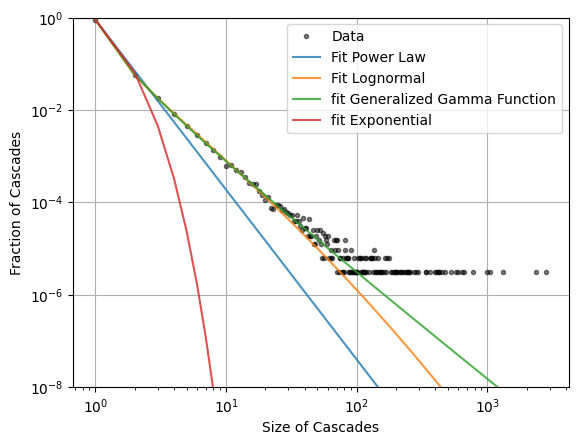

In [72]:
plt.plot(x, y, '.', color='k', alpha=0.5, label='Data')
#plt.plot(x, sim_pl, '-', label='fit Power Law')
#plt.plot(x, sim_ln, '-', label='fit Lognormal')
plt.plot(x, sim_pl, '-', alpha=0.8, label='Fit Power Law')
plt.plot(x, sim_ln, '-', alpha=0.8, label='Fit Lognormal')
plt.plot(x, sim_g, '-', alpha=0.8, label='fit Generalized Gamma Function')
plt.plot(x, sim_exp, '-', alpha=0.8, label='fit Exponential')
plt.legend()
plt.grid()
#plt.xlim([-10, 200])
plt.ylim([10e-9, 1])
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Size of Cascades")
plt.ylabel("Fraction of Cascades")

#plt.show()
#plt.savefig("dist.png")

/tmp/ipykernel_2203086/1005490247.py:17: RuntimeWarning: divide by zero encountered in true_divide
  y=1/x


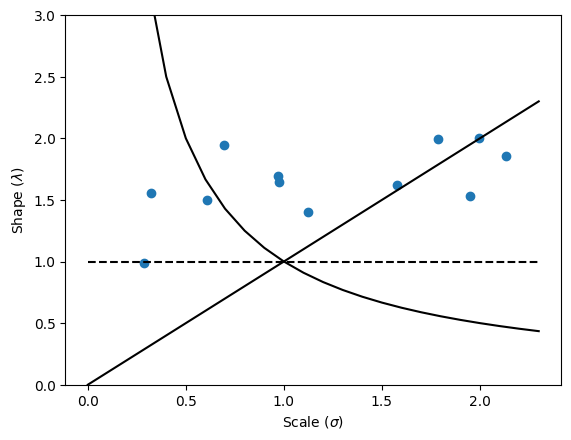

In [131]:
data = pd.read_csv('gamma_vals.txt', sep=" ", header=None)
data.columns = ["id", "a", "c", "alpha", "l"]
data.head()

a = data['a']
c = data['c']
alpha = data['alpha']

lambd = 1/pow(data['a'], 1/2)
sig = lambd/data['c']
be = data['alpha'] * pow(lambd,2)
beta = -1 * np.log(be)

plt.plot(lambd, sig, 'o', label='data')
x = np.arange(0,2.4,0.1)
plt.plot(x,x,'-', color='k')
y=1/x

z1 = len(x)
z = np.full(z1, 1)
plt.plot(x,z,'--', color='k')


plt.ylim([0, 3])
plt.plot(x, y, '-', color='k')
plt.xlabel("Scale ($\sigma$)")
plt.ylabel("Shape ($\lambda$)")

plt.savefig("cox_res.png")

In [14]:
data1_counts = pd.read_pickle('Filme_counts_pt.pkl')
data1_counts['Count'].to_pickle('Filme_counts_pt2.pkl')
size_distribution1 = data1_counts.groupby('Count')['Count'].count()
x1 = np.array(size_distribution1.index)
y1 = np.array(size_distribution1/len(data1_counts))

data2_counts = pd.read_pickle('Film_counts_nl.pkl')
data2_counts['Count'].to_pickle('Film_counts_nl2.pkl')
size_distribution2 = data2_counts.groupby('Count')['Count'].count()
x2 = np.array(size_distribution2.index)
y2 = np.array(size_distribution2/len(data2_counts))

data3_counts = pd.read_pickle('Film_counts_de.pkl')
data3_counts['Count'].to_pickle('Film_counts_de2.pkl')
size_distribution3 = data3_counts.groupby('Count')['Count'].count()
x3 = np.array(size_distribution3.index)
y3 = np.array(size_distribution3/len(data3_counts))

data4_counts = pd.read_pickle('Filme_counts_it.pkl')
data4_counts['Count'].to_pickle('Filme_counts_it2.pkl')
size_distribution4 = data4_counts.groupby('Count')['Count'].count()
x4 = np.array(size_distribution4.index)
y4 = np.array(size_distribution4/len(data4_counts))

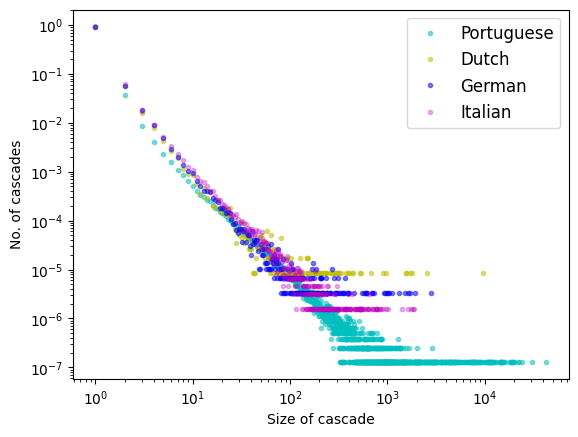

In [19]:
plt.plot(x1, y1, '.', color='c', alpha=0.5, label='Portuguese')
plt.plot(x2, y2, '.', color='y', alpha=0.5, label='Dutch')
plt.plot(x3, y3, '.', color='b', alpha=0.5, label='German')
plt.plot(x4, y4, '.', color='m', alpha=0.3, label='Italian')
plt.legend(scatterpoints=1, loc='upper right', prop={'size': 12})
plt.xlabel("Size of cascade")
plt.ylabel("No. of cascades")
plt.xscale("log")
plt.yscale("log")